Question 1.2

<ipython-input-3-32d020fd32f4>:98: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  correct_labels = np.sum(y_true == best_kmeans_labels)


Log-likelihood for sigma = 0.5: -1608.2904694410263
Log-likelihood for sigma = 1: -1607.8271846753682
Log-likelihood for sigma = 2: -1608.3650543913016


<ipython-input-3-32d020fd32f4>:151: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  correct_labels = np.sum(y_true == best_gmm_labels)


Log-likelihood for sigma = 4: -1608.8092466632847
Log-likelihood for sigma = 8: -1607.988383276764
Sigma values:  [0.5, 1, 2, 4, 8]
K-means objectives:  [3237.8590995537206]
GMM objectives:  [1607.988383276764]


ValueError: ignored

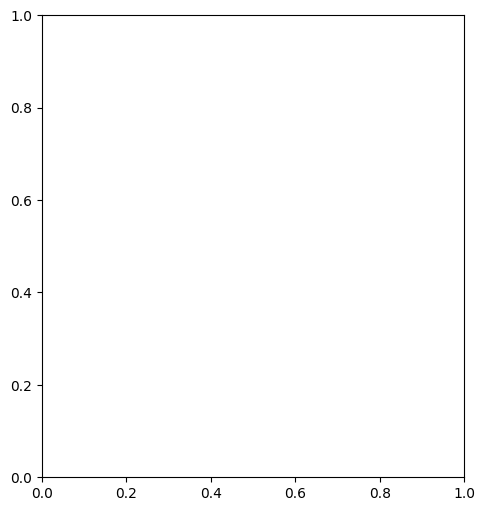

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Euclidean distance function
# def euclidean_distance(x1, x2):
#     return np.sqrt(np.sum((x1 - x2)**2))

# def multivariate_gaussian_pdf(X, mu, cov):
#     n = X.shape[1]
#     diff = (X - mu).T
#     return np.diagonal(1 / ((2 * np.pi) ** (n / 2) * np.linalg.det(cov) ** 0.5) * np.exp(-0.5 * np.dot(np.dot(diff.T, np.linalg.inv(cov)), diff))).T


# sigmas = [0.5, 1, 2, 4, 8]
# # Initialize place to store results
# kmeans_objective_results = []
# kmeans_accuracy_results = []
# gmm_objective_results = []
# gmm_accuracy_results = []

# for sigma in sigmas:

#     # Mean and covariance of the distribution Pa
#     mu_a = np.array([-1, -1])
#     sigma_a = sigma * np.array([[2, 0.5], [0.5, 1]])

#     # Sample 100 points from the distribution
#     P_a = np.random.multivariate_normal(mu_a, sigma_a, 100)

#     # Mean and covariance of the distribution Pb
#     mu_b = np.array([1, -1])
#     sigma_b = sigma * np.array([[1, -0.5], [-0.5, 2]])

#     # Sample 100 points from the distribution
#     P_b = np.random.multivariate_normal(mu_b, sigma_b, 100)

#     # Mean and covariance of the distribution Pc
#     mu_c = np.array([0, 1])
#     sigma_c = sigma * np.array([[1, 0], [0, 2]])

#     # Sample 100 points from the distribution
#     P_c = np.random.multivariate_normal(mu_c, sigma_c, 100)

#     # Combine samples into a single dataset
#     X = np.concatenate([P_a, P_b, P_c])

#     # Create an array of true labels
#     y_true = np.concatenate([np.repeat('a', 100), np.repeat('b', 100), np.repeat('c', 100)])

#     #--------------------K-MEANS------------------------------
#     # Define number of clusters and number of restarts
#     k = 3
#     num_restarts = 10

#     # Define containers to store the best results for K-means and GMM
#     best_kmeans_objective = np.inf
#     best_kmeans_centroids = None
#     best_kmeans_labels = None

#     for _ in range(num_restarts):
#         k = 3  # Number of clusters
#         centroids = X[np.random.choice(X.shape[0], size=k, replace=False)]

#         # Initialize the array of cluster labels
#         y_pred = np.zeros(X.shape[0])

#         # Loop until centroids stop changing
#         while True:
#             # Assign each point to the closest cluster
#             for i, x in enumerate(X):
#                 # Compute the distance between the point x and each centroid
#                 distances = [euclidean_distance(x, c) for c in centroids]
#                 # Assign the cluster label to the point x
#                 cluster = np.argmin(distances)
#                 y_pred[i] = cluster

#             # Update centroids to be the mean of their assigned points
#             centroids_old = centroids.copy()
#             for i in range(k):
#                 centroids[i] = np.mean(X[y_pred == i], axis=0)

#             # Check if centroids have converged
#             if np.allclose(centroids, centroids_old):
#                 break

#         # Calculate the clustering objective for this run
#         objective = 0
#         for i in range(k):
#             objective += np.sum((X[y_pred == i] - centroids[i])**2)

#         # If this run has a better objective than the current best, update the best objective, centroids, and labels
#         if objective < best_kmeans_objective:
#           best_kmeans_objective = objective
#           best_kmeans_centroids = centroids
#           best_kmeans_labels = y_pred

#     # Calculate accuracy for K-means
#     correct_labels = np.sum(y_true == best_kmeans_labels)
#     kmeans_accuracy = correct_labels / len(y_true)
#     kmeans_accuracy_results.append(kmeans_accuracy)


#     #--------------------GMM------------------------------


# for sigma in sigmas:
#     # Initialize parameters
#     means = X[np.random.choice(X.shape[0], size=k, replace=False)]
#     covariances = [np.cov(X, rowvar=False)] * k
#     mixing_coeffs = np.full(shape=k, fill_value=1/k)

#     best_gmm_log_likelihood = -np.inf
#     best_gmm_means = None
#     best_gmm_covariances = None
#     best_gmm_mixing_coeffs = None
#     best_gmm_labels = None

#     # EM algorithm
#     for _ in range(num_restarts):
#         # E-step: compute responsibilities
#         resp = np.zeros((X.shape[0], k))
#         for i in range(k):
#             resp[:, i] = mixing_coeffs[i] * multivariate_gaussian_pdf(X, means[i], covariances[i])
#         resp = resp / resp.sum(axis=1, keepdims=1)

#         # M-step: update parameters
#         resp_sum = resp.sum(axis=0)
#         mixing_coeffs = resp_sum / X.shape[0]
#         for i in range(k):
#             means[i] = (X * resp[:, i, None]).sum(axis=0) / resp_sum[i]
#             diff = X - means[i]
#             covariances[i] = (resp[:, i, None, None] * (diff[:, :, None] @ diff[:, None, :])).sum(axis=0) / resp_sum[i]

#     # Compute log-likelihood
#     log_likelihood = 0
#     for i in range(k):
#         log_likelihood += mixing_coeffs[i] * multivariate_gaussian_pdf(X, means[i], covariances[i])
#     log_likelihood = np.log(log_likelihood).sum()

#     # Print log-likelihood
#     print(f'Log-likelihood for sigma = {sigma}: {log_likelihood}')

#     if log_likelihood > best_gmm_log_likelihood:
#       best_gmm_log_likelihood = log_likelihood
#       best_gmm_means = means
#       best_gmm_covariances = covariances
#       best_gmm_mixing_coeffs = mixing_coeffs
#       best_gmm_labels = np.argmax(resp, axis=1)

#     # Calculate accuracy for GMM
#     correct_labels = np.sum(y_true == best_gmm_labels)
#     gmm_accuracy = correct_labels / len(y_true)
#     gmm_accuracy_results.append(gmm_accuracy)


# kmeans_objective_results.append(best_kmeans_objective)
# gmm_objective_results.append(-best_gmm_log_likelihood)

# # Print the results
# print("Sigma values: ", sigmas)
# print("K-means objectives: ", kmeans_objective_results)
# print("GMM objectives: ", gmm_objective_results)

# # Plot the results for K-means and GMM
# plt.figure(figsize=(12, 6))
# plt.subplot(121)
# plt.plot(sigmas, kmeans_objective_results, label='K-means')
# plt.plot(sigmas, gmm_objective_results, label='GMM')
# plt.xlabel('Sigma')
# plt.ylabel('Objective')
# plt.legend()

# plt.subplot(122)
# plt.plot(sigmas, kmeans_accuracy_results, label='K-means')
# plt.plot(sigmas, gmm_accuracy_results, label='GMM')
# plt.xlabel('Sigma')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.show()





[-938.0919670726792, -1057.5305253662314, -1205.754481744484, -1403.6316857061965, -1561.3073528863295]


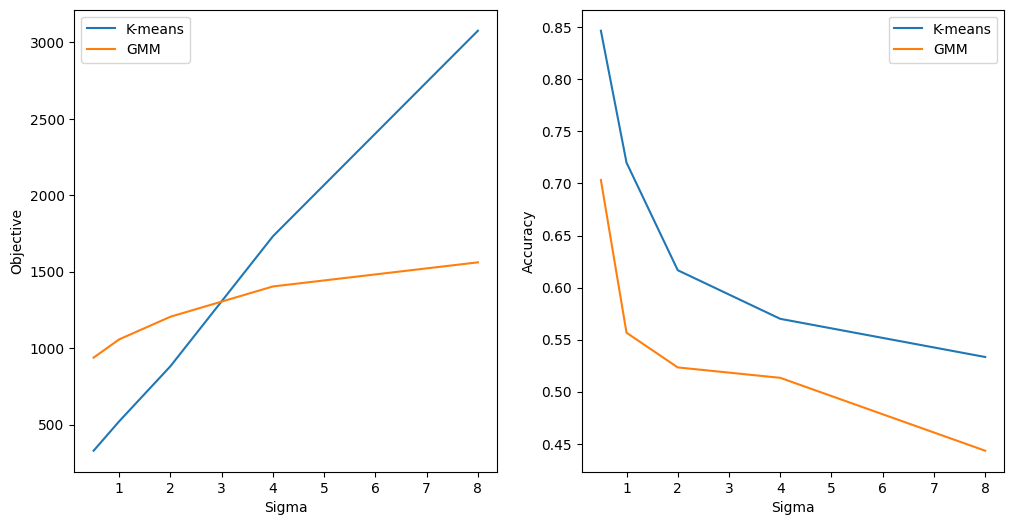

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Euclidean distance function
def euclidean_distance(X, centroids):
    return np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))

# Gaussian pdf function
def multivariate_gaussian_pdf(X, mu, cov):
    n = X.shape[1]
    diff = (X - mu).T
    return np.diagonal(1 / ((2 * np.pi) ** (n / 2) * np.linalg.det(cov) ** 0.5) * np.exp(-0.5 * np.dot(np.dot(diff.T, np.linalg.inv(cov)), diff))).T

# Calculate accuracy function
def calculate_accuracy(y_true, y_pred):
    correct_labels = 0
    for i in set(y_pred):
        a = [y_true[j] for j in range(len(y_true)) if y_pred[j] == i]
        most_common = max(set(a), key=a.count)
        correct_labels += a.count(most_common)
    return correct_labels / len(y_true)

sigmas = [0.5, 1, 2, 4, 8]

kmeans_objective_results = []
kmeans_accuracy_results = []
gmm_objective_results = []
gmm_accuracy_results = []

for sigma in sigmas:
    mu_a = np.array([-1, -1])
    sigma_a = sigma*np.array([[2, 0.5], [0.5, 1]])
    samples_a = np.random.multivariate_normal(mu_a, sigma_a, 100)

    mu_b = np.array([1, -1])
    sigma_b = sigma*np.array([[1, -0.5], [-0.5, 2]])
    samples_b = np.random.multivariate_normal(mu_b, sigma_b, 100)

    mu_c = np.array([0, 1])
    sigma_c = sigma*np.array([[1, 0], [0, 2]])
    samples_c = np.random.multivariate_normal(mu_c, sigma_c, 100)

    X = np.r_[samples_a, samples_b, samples_c]
    y = np.array([0]*100 + [1]*100 + [2]*100)  # a=0, b=1, c=2

    best_kmeans_objective = np.inf
    best_gmm_objective = -np.inf

    # Cluster number and restarts
    k = 3
    num_restarts = 10

    #--------------K-means clustering-----------------
    for _ in range(num_restarts):
        # Initialize cluster centers
        indices = np.random.choice(X.shape[0], k, replace=False)
        centroids = X[indices, :]

        # Initialize differences
        diff = np.inf
        while diff > 1e-6:
            dist_to_centroid = euclidean_distance(centroids, X)
            labels_pred = np.argmin(dist_to_centroid, axis=1)  #Assign each point to the closest centroid

            # Recompute centroids as the mean of all data points assigned to that cluser
            new_centroids = np.array([X[labels_pred==i].mean(axis=0) for i in range(k)])

            # Update differences and centroids
            diff = np.linalg.norm(new_centroids - centroids)
            centroids = new_centroids

        # K-means Objective
        objective = sum([np.sum((X[labels_pred==i] - centroids[i])**2) for i in range(k)])

        # Save best centroids and labels
        if objective < best_kmeans_objective:
            best_kmeans_objective = objective
            best_kmeans_centroids = centroids
            best_kmeans_labels = labels_pred

    kmeans_accuracy = calculate_accuracy(y, best_kmeans_labels)
    kmeans_objective_results.append(best_kmeans_objective)
    kmeans_accuracy_results.append(kmeans_accuracy)

  #-----------EM Algorithm---------------
    for _ in range(num_restarts):
        means = X[np.random.choice(X.shape[0], size=k, replace=False)]
        covariances = [np.eye(X.shape[1])] * k
        phi = [1/k] * k

        # Initialize w
        w = np.zeros((X.shape[0], k))

        # Initialize differences
        diff = np.inf
        old_objective = np.inf

        while diff > 1e-6:

            # E-Step: computing posterior probability
            for i in range(k):
                w[:, i] = phi[i] * multivariate_gaussian_pdf(X, means[i], covariances[i])

            new_objective = np.sum(np.log(np.sum(w, axis=1)))

            # Normalize w's
            sum_w = np.sum(w, axis=1)
            w = (w.T / sum_w).T

            # M-Step: computing the estimates with current w's
            phi = np.mean(w, axis=0)
            means = np.dot(w.T, X) / np.sum(w, axis=0)[:, None]
            for i in range(k):
                X_minus_mu = X - means[i]
                covariances[i] = np.dot((X_minus_mu.T * w[:, i]), X_minus_mu) / np.sum(w, axis=0)[:, None][i]

            # Update differences and objectives
            diff = np.abs(new_objective - old_objective)
            old_objective = new_objective

        # Save best objective
        if new_objective > best_gmm_objective:
            best_gmm_objective = new_objective
            best_gmm_means = means
            best_gmm_covariances = covariances
            best_gmm_labels = np.argmax(w, axis=1)

    gmm_accuracy = calculate_accuracy(y, best_gmm_labels)
    gmm_objective_results.append(best_gmm_objective)
    gmm_accuracy_results.append(gmm_accuracy)

plt.figure(figsize=(12, 6))
print(gmm_objective_results)

#GMM objective to negative log-likelihood
negative_gmm_objective_results = [-x for x in gmm_objective_results]

plt.subplot(121)
plt.plot(sigmas, kmeans_objective_results, label='K-means')
plt.plot(sigmas, negative_gmm_objective_results, label='GMM')
plt.xlabel('Sigma')
plt.ylabel('Objective')
plt.legend()

plt.subplot(122)
plt.plot(sigmas, kmeans_accuracy_results, label='K-means')
plt.plot(sigmas, gmm_accuracy_results, label='GMM')
plt.xlabel('Sigma')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

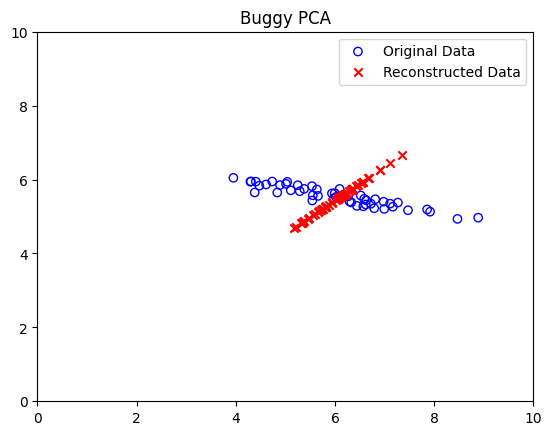

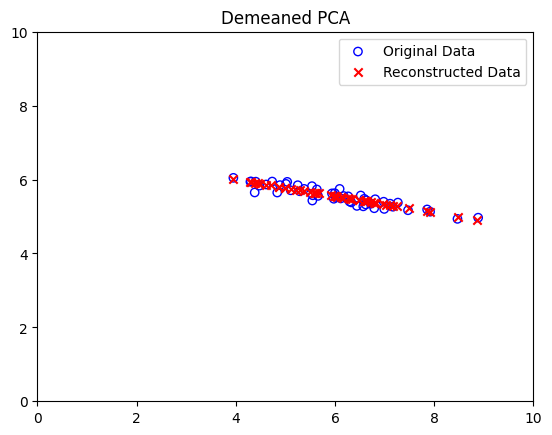

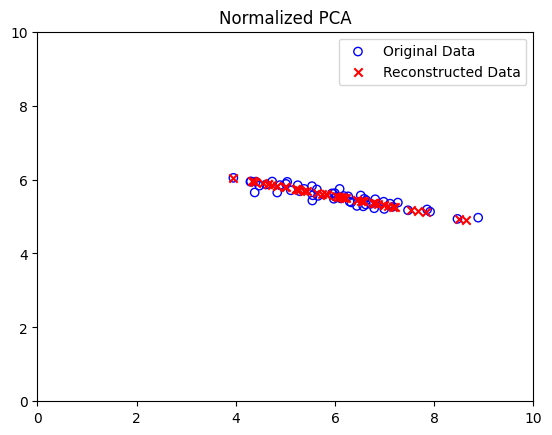

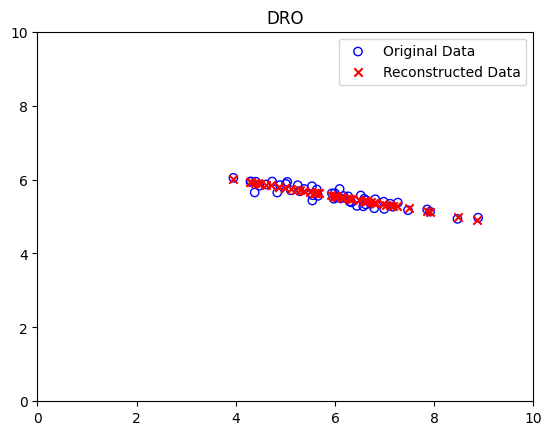

Buggy PCA reconstruction error (2D Dataset):  44.34515418673971
Demeaned PCA reconstruction error (2D Dataset):  0.5003042814256453
Normalized PCA reconstruction error (2D Dataset):  2.4736041727385336
DRO reconstruction error (2D Dataset): 0.5003042814256455
Singular values for d = 30: 514.7860131284439
Singular values for d = 31: 28.72590083294839


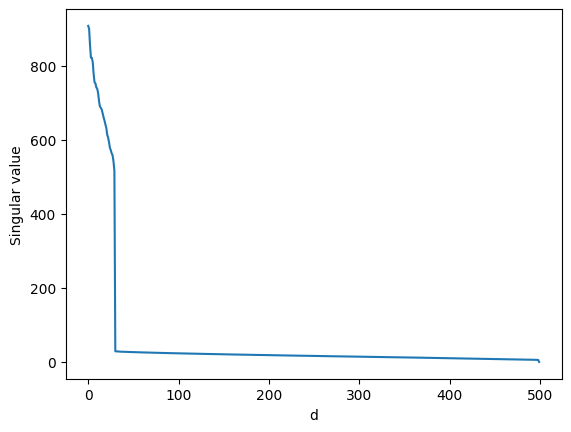

Buggy PCA reconstruction error (1000D Dataset): 401365.69931017916
Demeaned PCA reconstruction error (1000D Dataset):  136522.97948930142
Normalized PCA reconstruction error (1000D Dataset): 136814.2904988116
DRO reconstruction error (1000D Dataset):  136522.97948930142


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def buggyPCA(X,d):
   [U,S,Vt] = np.linalg.svd(X)
   Z = X @ Vt[:d,:].T
   reconst = Z @ Vt[:d,:]
   return U,S,Vt,Z,reconst

def demeanedPCA(X,d):
    X_mean = np.mean(X, axis=0)
    X_demeaned = X - X_mean
    [U,S,Vt] = np.linalg.svd(X_demeaned)
    Z = X_demeaned @ Vt[:d,:].T
    reconst = Z @ Vt[:d,:] + X_mean
    return U,S,Vt,Z,reconst

def normalizedPCA(X,d):
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X,axis = 0)
    X_normalized = (X - X_mean)/X_std
    [U,S,Vt] = np.linalg.svd(X_normalized)
    Z = X_normalized @ Vt[:d,:].T
    reconst = (Z @ Vt[:d,:]) * X_std + X_mean
    return U,S,Vt,Z,reconst

def DRO(X, d):
    b = np.mean(X, axis=0)
    X_demeaned = X - b
    U, Sigma, Vt = np.linalg.svd(X_demeaned, full_matrices=False)
    # plt.plot(Sigma)
    # plt.xlim([20, 40])
    Sigma_d = np.zeros((d, d))
    np.fill_diagonal(Sigma_d, Sigma[:d])
    U_d = U[:, :d]
    Vt_d = Vt[:d, :]
    A = Vt_d.T @ Sigma_d
    Z = U_d
    reconst = Z @ A.T + b
    return U,S,Vt,A, Z, b, reconst

def error(X, reconst):
    return np.sum((X - reconst) ** 2)

def plot(X, reconst,title):
    plt.scatter(X[:, 0], X[:, 1], label='Original Data', edgecolors='blue', facecolors='none', marker='o')
    plt.scatter(reconst[:, 0], reconst[:, 1], label='Reconstructed Data', color='red', marker='x')
    plt.xlim([0, 10])
    plt.ylim([0, 10])
    plt.legend()
    plt.title(title)
    plt.show()

file = 'data2D.csv'
df = pd.read_csv(file, header=None)
X = df.values

d = 1

U,S,Vt,Z,reconstB = buggyPCA(X,d)
plot(X,reconstB,"Buggy PCA")

U,S,Vt,Z,reconstD = demeanedPCA(X,d)
plot(X,reconstD, "Demeaned PCA")

U,S,Vt,Z,reconstN = normalizedPCA(X,d)
plot(X,reconstN, "Normalized PCA")

U,S,Vt,A,Z,b,reconstDRO = DRO(X,d)
plot(X,reconstDRO, "DRO")

print("Buggy PCA reconstruction error (2D Dataset): ", error(X,reconstB))
print("Demeaned PCA reconstruction error (2D Dataset): ", error(X,reconstD))
print("Normalized PCA reconstruction error (2D Dataset): ", error(X,reconstN))
print("DRO reconstruction error (2D Dataset):", error(X,reconstDRO))



file = 'data1000D.csv'
df = pd.read_csv(file, header=None)
X = df.values

X_mean = np.mean(X, axis=0)
Y = X - X_mean
U, S, Vt = np.linalg.svd(Y)

plt.plot(S)
print(f"Singular values for d = 30:", S[29])
print(f"Singular values for d = 31:", S[30])
plt.xlabel('d')
plt.ylabel('Singular value')
#plt.xlim([20, 40])
plt.show()


d = 30 #Determined via observation


U,S,Vt,Z,reconst = buggyPCA(X,d)
print("Buggy PCA reconstruction error (1000D Dataset):", error(X,reconst))

U,S,Vt,Z,reconst = demeanedPCA(X,d)
print("Demeaned PCA reconstruction error (1000D Dataset): ", error(X,reconst))

U,S,Vt,Z,reconst = normalizedPCA(X,d)
print("Normalized PCA reconstruction error (1000D Dataset):", error(X,reconst))

U,S,Vt,A,Z,b,reconst = DRO(X,d)
print("DRO reconstruction error (1000D Dataset): ", error(X,reconst))
